### **Tutorial: Introducing NEMODataTree**

#### **Description:**
Introductory tutorial to the NEMODataTree object, extending the xarray.DataTree data structure.

#### **Created By:**
Ollie Tooth (oliver.tooth@noc.ac.uk)

In [1]:
# -- Import Python dependencies -- #
import numpy as np
import xarray as xr
from nemo_cookbook import NEMODataTree
import matplotlib.pyplot as plt

#### **Downloading Example NEMO Outputs: AGRIF_DEMO**

* Let's start by downloading example NEMO mode outputs generated from the AGRIF_DEMO reference case:

In [ ]:
# -- Example downloading AGRIF_DEMO data -- #
import os
import urllib.request
import shutil

# Create output directory:
out_dir = "example_data"
os.makedirs(out_dir, exist_ok=True)

# List of files to download:
base_url = "https://noc-msm-o.s3-ext.jc.rl.ac.uk/nemo-cookbook/examples/AGRIF-DEMO"
files_parent = [f"ORCA2_5d_00010101_00010110_grid_{grid}.nc" for grid in ['T', 'U', 'V']]
files_child = [f"2_Nordic_5d_00010101_00010110_grid_{grid}.nc" for grid in ['T', 'U', 'V']]
files_grandchild = [f"3_Nordic_5d_00010101_00010110_grid_{grid}.nc" for grid in ['T', 'U', 'V']]
files = ["domain_cfg.nc", "2_domain_cfg.nc", "3_domain_cfg.nc", *files_parent, *files_child, *files_grandchild]

# Download files to output directory:
for file in files:
    print(f"Downloading {file} ...")
    url = f"{base_url}/{file}"
    out_fpath = f"{out_dir}/{file}"
    if os.path.exists(out_fpath):
        print("... file already exists, skipping download.")
        continue
    with urllib.request.urlopen(url) as response, open(out_fpath, 'wb') as out_file:
        shutil.copyfileobj(response, out_file)

#### **Downloading Example NEMO Outputs: AMM12**

* Let's start by downloading example NEMO mode outputs generated from the AMM12 reference case:

In [ ]:
# -- Example downloading AGRIF_DEMO data -- #
import os
import urllib.request
import shutil

# Create output directory:
out_dir = "example_data/AMM12"
os.makedirs(out_dir, exist_ok=True)

# List of files to download:
base_url = "https://noc-msm-o.s3-ext.jc.rl.ac.uk/nemo-cookbook/examples/AMM12"
files_parent = [f"AMM12_1d_20120102_20120110_grid_{grid}.nc" for grid in ['T', 'U', 'V']]
files = ["domain_cfg.nc" , *files_parent]

# Download files to output directory:
for file in files:
    print(f"Downloading {file} ...")
    url = f"{base_url}/{file}"
    out_fpath = f"{out_dir}/{file}"
    if os.path.exists(out_fpath):
        print("... file already exists, skipping download.")
        continue
    with urllib.request.urlopen(url) as response, open(out_fpath, 'wb') as out_file:
        shutil.copyfileobj(response, out_file)

In [ ]:
# Input to NEMODataTree.from_dict() should be a dictionary or nested dictionary:
# TODO: Handling nav_lev or z vertical dimension in domain_cfg.nc files:
root_path = "./example_data/AMM12"

paths = {"parent": {
        "domain": f"{root_path}/domain_cfg.nc",
        "gridT": f"{root_path}/AMM12_1d_20120102_20120110_grid_T.nc",
        "gridU": f"{root_path}/AMM12_1d_20120102_20120110_grid_U.nc",
        "gridV": f"{root_path}/AMM12_1d_20120102_20120110_grid_V.nc",
        }}

nemo = NEMODataTree.from_paths(paths=paths, nests=None, iperio=False, nftype=None)

nemo

In [ ]:
xr.open_dataset(f"{root_path}/domain_cfg.nc")

#### **Defining Example NEMO Outputs: AGRIF_DEMO**

* Let's start by creating the expected input dictionaries describing the filepaths and properties of our parent and child domains.

* In this example, we will consider outputs for the ORCA2 global domain and Nordic Seas child domain produced by the AGRIF_DEMO reference case. For now, we will not consider the grandchild domain which is included within the Nordic Seas child domain.

* We first define the `paths` dictionary, which itself contains up to three nested dictionaries ("parent", "child" and "grandchild"). The "parent" dictionary defines the filepaths to the domain_cfg and gridT/U/V/W output files produced by NEMO for our ORCA2 parent domain. The "child dictionary defines the equivalent filepaths for one or more child domains, which are themselves nested inside the "child" dictionary with unique domain labels "1", "2" etc. The "grandchild" dictionary defines the filepaths for one of more grandchild domains using the same nested structure as the "child" dictionary. Notably, the unique domain label for the first grandchild domain should be a continuation from the final entry in the "child" dictionary. The gridF node will be created from a new Dataset populated with the F-grid domain variables (i.e., `e1f`, `e2f`, `e3f`, `glamf`, `gphif` etc.) 

* Next, we define the `nests` dictionary, which describes the properties of child and grandchild domains to be stored in the DataTree. For each child or grandchild domain, a nested dictionary should be included in `nests` which defines the following domain properties: `parent`: unqiue label identifying parent domain, `rx`, `ry`: horizontal grid refinement factors used in this nest, `imin`, `imax`, `jmin`, `jmax`: i,j coordinates used to define the nest domain within the parent domain. All of the above properties should be transferred from the AGRIF_FIXEDGRIDS.in ancilary file used to perform the simulation.

**Note: If we do not specify paths to all of the NEMO model grid files (T/U/V/W), these will be created and populated with domain variables (e.g., `e1u`, `glamu`, `gphiu` etc.)**

In [ ]:
# Define root_path to example AGRIF_DEMO model output:
root_path = "./example_data/AGRIF_DEMO"


# Define paths dictionary with ORCA2 parent and Nordic child domains:
paths = {"parent": {
        "domain": f"{root_path}/domain_cfg.nc",
        "gridT": f"{root_path}/ORCA2_5d_00010101_00010110_grid_T.nc",
        "gridU": f"{root_path}/ORCA2_5d_00010101_00010110_grid_U.nc",
        "gridV": f"{root_path}/ORCA2_5d_00010101_00010110_grid_V.nc",
        },
        "child": {
        "1":{
        "domain": f"{root_path}/2_domain_cfg.nc",
        "gridT": f"{root_path}/2_Nordic_5d_00010101_00010110_grid_T.nc",
        "gridU": f"{root_path}/2_Nordic_5d_00010101_00010110_grid_U.nc",
        "gridV": f"{root_path}/2_Nordic_5d_00010101_00010110_grid_V.nc",
        }},
        }

# Define properties of Nordic child domain [nest] (using Fortran-indexing as in NEMO):
nests = {
    "1": {
    "parent": "/",
    "rx": 4,
    "ry": 4,
    "imin": 121,
    "imax": 146,
    "jmin": 113,
    "jmax": 133,
    "iperio": False
    },
    }

#### **Defining NEMODataTree:**

* `NEMODataTree` is an extension of the xarray.DataTree structure designed to store a collection of xarray objects as nodes in a hierarchical tree.

* A new `NEMODataTree` object can be created / instantiated by using a constructor, `.from_paths()` or `.from_datasets()`.

* Here, we demonstrate how to create a new `NEMODataTree` called `nemo` from the paths and nests dictionaries defined above.

* **Note 1.** we need to specify that our parent domain is zonally periodic (`iperio`) and north folding on T-points (ORCA2) rather than a closed (regional) domain.

* **Note 2.** we also do not need to include the `tmask`, `umask`...`fmask` arrays in our domain_cfg.nc input file since these are calculated in the `mask.py` utility module using the `top_level` and `bottom_level` variables analogously to the NEMO DOMAINcfg (lateral boundary conditions - north folding - is accounted for).

In [ ]:
nemo = NEMODataTree.from_paths(paths=paths, nests=nests, iperio=True, nftype="T")
nemo

#### **What's in the NEMODataTree?**

By looking at the output of our `NEMODataTree` above, we can see that each `NEMODataTree` contains:

* a root node at path "/" which contains only the coodinates and data variables which are inherited by all of it's child nodes. In our case, this is only the `time_counter` coordinates. The root node is special as it has no parent.

* the root node has 5 child nodes which collectively define the parent model domain (i.e., ORCA2). Each child node corresponds to a NEMO model grid Dataset. In this case, '/gridT' is the ORCA2 T-grid (including corresponding domain variables), '/gridU' is the ORCA2 U-grid and so on.

* each child node has a further child node (grandchild to the root node) corresponding to the equivalent NEMO model grid Dataset in the child domain. In this example, '/gridT/1_gridT' is the Nordic Seas T-grid (including corresponding domain variables) which is nested inside the ORCA2 T-grid. For additional child domains, the node paths take the form '/grid{grid_type}/{label}_grid{grid_type}' where `grid_type` is one of `["T", "U", "V", "W", "F"]` and `label` is the unique label of this child domain.

In addition to the defining a hierarchical structure to store and analyse NEMO model outputs, creating a `NEMODataTree` transforms the coordinates of the output files to use the `i`, `j`, `k` coordinate system used by NEMO itself. This means all gridT nodes / Datasets have coordinates `i`, `j`, `k` which are all integer values. Meanwhile, gridU / V / W / F nodes / Datasets have coordinates `i`, `j`, `k` which are all integer and a half values as shown in **Table 3.1** of the NEMO Manual (https://zenodo.org/records/14515373).

**Note, each child grid Dataset also inherits the coordinates of its parent grid following DataTree inheritance.**

In [ ]:
nemo['/gridT/1_gridT']

**Note:** Child domains are pre-processed to remove the `nghost_w`, `nghost_s` = 4 ghost points included in NEMO AGRIF outputs. This means that we can easily translate between a given child and parent domain in our analyses without having to account for ghost points (i.e., when performing aggregations, such as volume/area-weighted averages over the child domain).

#### **Implementing NEMO Scalar & Vector Operations**

**1. Scalar Operations**

Following the NEMO Manual, the gradient of a variable $q$ can be defined in discrete form in curvilinear $s$-coordinates as:

$$\nabla q = \frac{1}{e_{1u}} \delta_{i+1/2} [q] i + \frac{1}{e_{2v}} \delta_{j+1/2} [q] j + \frac{1}{e_{3t}} \delta_{k+1/2} [q] k$$

where $\delta_{i} [q]$ is the difference operator defined by:

$$\delta_{i} [q] = q(i + 1/2) - q(i - 1/2)$$

To calculate the gradient along a single dimension (e.g., $\nabla q . i$), we can use the `NEMODataTree.gradient()` method.

In [ ]:
# -- Figure -- #
# Plotting the sea surface height (SSH) from the gridT variable in the Nordic child domain:
plt.figure()
nemo['/gridT/1_gridT']['zos'].where(nemo['/gridT/1_gridT']['tmask'].isel(k1=0)).plot()

# -- Figure -- #
plt.figure()
# Plotting the zonal gradient of the sea surface height (SSH) from the gridT variable in the Nordic child domain:
nemo.gradient(var='zos', dom='1', dim='i').plot()

# -- Figure -- #
plt.figure()
# Plotting the meridional gradient of the sea surface height (SSH) from the gridT variable in the Nordic child domain:
nemo.gradient(var='zos', dom='1', dim='j').plot()

In [ ]:
# -- Figure -- #
# Plotting vertical temperature (thetao) section from the gridT variable in the Nordic child domain:
plt.figure()
nemo['/gridT/1_gridT']['thetao'].isel(j1=0).plot(y='1_deptht')
plt.ylim([3500, 0])

# -- Figure -- #
# Plotting vertical temperature (thetao) gradient from the gridT variable in the Nordic child domain:
plt.figure()
nemo.gradient(var='thetao', dom='1', dim='k').isel(j1=0).plot(y='1_depthw')
plt.ylim([3500, 0])

In [ ]:
nemo.divergence(vars=['uo', 'vo'], dom="1").isel(k1=0).plot()

In [ ]:
nemo.curl(vars=['uo', 'vo'], dom="1").isel(k1=0).plot()

### **Masking Functions**

In [ ]:
# Define bbox to mask:
lon_poly = [-80, 10, 10, -80, -80]
lat_poly = [20, 20, 40, 40, 20]

mask_test = nemo.mask_with_polygon(lon_poly=lon_poly, lat_poly=lat_poly, dom='.')

nemo['/gridT']['tos'].where(mask_test).plot()

In [ ]:
# -- Masked statistics -- #
nemo['/gridT']['tos'].where(nemo['/gridT']['tmask'] & mask_test).weighted(nemo['/gridT']['e1t'] * nemo['/gridT']['e2t']).mean(dim=["j", "i"], skipna=True).plot()
nemo['/gridT']['tos'].where(nemo['/gridT']['tmask'] & mask_test).mean(dim=["j", "i"], skipna=True).plot()

### **Interpolation / Coordinate Transformation Functions**

In [ ]:
# .transform_hgrid() method to transform T-point variable to U/V/W/F-point:
nemo["/gridT"]["zos"].interp(i=nemo["/gridU"]["i"], method="linear").where(nemo["/gridU"]["umask"].isel(k=0)).plot()
# nemo["/gridT"]["zos"].interp(j=nemo["/gridV"]["j"], method="linear").where(nemo["/gridV"]["vmask"].isel(k=0)).plot()
# nemo["/gridT"]["zos"].interp(i=nemo["/gridU"]["i"], j=nemo["/gridV"]["j"], method="linear").where(nemo["/gridF"]["fmask"].isel(k=0)).plot()

### **Comparing parent & child domains.**

In [ ]:
nemo['/gridT']['zos'].where(nemo['/gridT']['tmask'].isel(k=0)).isel(time_counter=0).plot(cmap='RdBu_r')
plt.plot([121, 147, 147, 121, 121], [113, 113, 134, 134, 113], lw=2, color='0.1')

In [ ]:
(nemo['/gridT/1_gridT']['zos'].where(nemo['/gridT/1_gridT']['tmask'].isel(k1=0))).isel(time_counter=0).plot(cmap='RdBu_r')

#### **RAPID-Evolution**

In [2]:
# -- Import Python dependencies -- #
import xarray as xr
from nemo_cookbook import NEMODataTree

In [3]:
root_path = "https://rapidevolution-o.s3-ext.jc.rl.ac.uk/r-evo1-eorca025-rapid12-rapid36"

dsPdom = xr.open_dataset('/Users/otooth/Library/CloudStorage/OneDrive-NOC/Projects/nemo_cookbook/data/RAPID-Evolution/eORCA025-RAPID12-RAPID36_domain_cfg.nc')
ds1dom = xr.open_dataset('/Users/otooth/Library/CloudStorage/OneDrive-NOC/Projects/nemo_cookbook/data/RAPID-Evolution/1_eORCA025-RAPID12-RAPID36_domain_cfg.nc')
ds2dom = xr.open_dataset('/Users/otooth/Library/CloudStorage/OneDrive-NOC/Projects/nemo_cookbook/data/RAPID-Evolution/2_eORCA025-RAPID12-RAPID36_domain_cfg.nc')

dsP_gridT = xr.open_zarr(f'{root_path}/eORCA025/T1m/thetao_con')
ds1_gridT = xr.open_zarr(f'{root_path}/RAPID12/T1m/thetao_con')
ds2_gridT = xr.open_zarr(f'{root_path}/RAPID36/T1m/thetao_con')

dsP_gridU = xr.open_zarr(f'{root_path}/eORCA025/U1m/uo')
ds1_gridU = xr.open_zarr(f'{root_path}/RAPID12/U1m/uo')
ds2_gridU = xr.open_zarr(f'{root_path}/RAPID36/U1m/uo')

dsP_gridV = xr.open_zarr(f'{root_path}/eORCA025/V1m/vo')
ds1_gridV = xr.open_zarr(f'{root_path}/RAPID12/V1m/vo')
ds2_gridV = xr.open_zarr(f'{root_path}/RAPID36/V1m/vo')


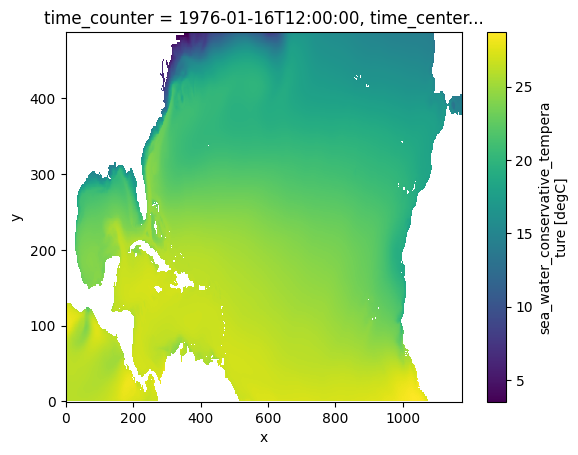

In [7]:
ds1_gridT.thetao_con.isel(time_counter=0, deptht=0).plot()

In [10]:
ds1_gridT.thetao_con.isel(time_counter=0, deptht=0, x=650).values

array([      nan, 27.151855, 27.151855, 27.151854, 27.118425, 27.104204,
       27.094406, 27.073133, 27.061222, 27.04833 , 27.032934, 27.018023,
       27.002207, 26.98578 , 26.969973, 26.953918, 26.937965, 26.921877,
       26.905523, 26.88857 , 26.871826, 26.854456, 26.837193, 26.82102 ,
       26.805344, 26.7899  , 26.775248, 26.760881, 26.746084, 26.731066,
       26.715164, 26.698526, 26.679958, 26.663105, 26.64725 , 26.631538,
       26.615002, 26.597942, 26.581015, 26.564342, 26.548246, 26.532326,
       26.516663, 26.501154, 26.486055, 26.470888, 26.45561 , 26.439426,
       26.42349 , 26.407242, 26.39156 , 26.375748, 26.359716, 26.34367 ,
       26.327694, 26.311024, 26.294813, 26.278946, 26.263367, 26.247923,
       26.233286, 26.21942 , 26.206064, 26.193424, 26.181238, 26.169575,
       26.15865 , 26.146835, 26.136726, 26.126589, 26.115257, 26.102842,
       26.09019 , 26.077948, 26.065863, 26.054129, 26.04037 , 26.027594,
       26.013884, 26.000366, 25.98837 , 25.974339, 

In [ ]:
xr.open_zarr(f'{root_path}/RAPID36_subset1/T1d/ssh')

In [ ]:
datasets = {"parent": {
            "domain": dsPdom,
            "gridT": dsP_gridT,
            "gridU": dsP_gridU,
            "gridV": dsP_gridV,
            },
            "child": {
            "1":{
            "domain": ds1dom,
            "gridT": ds1_gridT,
            "gridU": ds1_gridU,
            "gridV": ds1_gridV,
            }},
            "grandchild": {
            "2": {
            "domain": ds2dom,
            "gridT": ds2_gridT,
            "gridU": ds2_gridU,
            "gridV": ds2_gridV,
            }},
            }

nests = {
    "1": {
    "parent": "/",
    "iperio": False,
    "rx": 3,
    "ry": 3,
    "imin": 750,
    "imax": 1140,
    "jmin": 710,
    "jmax": 870 
    },
    "2": {
    "parent": "1",
    "iperio": False,
    "rx": 3,
    "ry": 3,
    "imin": 18,
    "imax": 1092,
    "jmin": 137,
    "jmax": 307
    }
    }

In [ ]:
nemo = NEMODataTree.from_datasets(datasets=datasets, nests=nests, iperio=True, nftype="T")
nemo

In [ ]:
# Indexing a child grid using the parent indices:
i1_target = nemo['/gridT/1_gridT']['i_i1'].isin([750])
j1_target = nemo['/gridT/1_gridT']['j_j1'].isin([710])

nemo['/gridT/1_gridT']['thetao_con'].sel(i1=i1_target, j1=j1_target)

In [ ]:
nemo['/gridT/1_gridT']['thetao_con'].isel(time_counter=0).groupby('i_i1').mean()

In [ ]:
plt.figure(figsize=(10, 4))
nemo['/gridT/1_gridT/2_gridT']['thetao_con'].isel(time_counter=0, k2=0).plot(cmap='RdBu_r')